In [54]:
# !pip install koreanize-matplotlib

In [55]:
import numpy as np
import pandas as pd 

data = pd.read_csv("./2019.csv", encoding="ANSI")

df = pd.DataFrame(data)
df

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,...,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드
0,201900,1,2,1,0,0,0,0,1,1,...,0,99416,0,15190,0,0,4893,50000,29333,1
1,201900,2,1,3,2,0,0,0,1,2,...,3333,316357,37697,0,0,110160,0,142500,26000,1
2,201900,3,2,1,0,0,0,0,1,1,...,0,9206,0,0,4050,3728,0,0,1429,1
3,201900,4,1,3,2,0,0,1,0,2,...,0,445731,71766,0,245393,104001,4857,7143,12571,1
4,201900,5,1,1,1,0,0,0,1,1,...,525514,359537,13844,0,65571,50121,0,57143,172857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,201900,9506,2,4,2,0,0,1,0,2,...,0,1538751,95328,0,8370,142911,1075742,55000,161400,0
9506,201900,9507,2,4,3,0,0,1,0,2,...,0,685210,8298,0,0,47612,422300,181000,26000,0
9507,201900,9508,2,5,3,0,0,1,0,3,...,0,1459269,96528,0,174473,72436,304014,640909,170909,0
9508,201900,9509,1,1,1,0,0,0,1,1,...,454545,117633,24609,0,0,26887,0,65227,909,0


데이터 전처리 

In [56]:
#열 변수 변경

df.rename(columns={
    '가계지출금액': '전체소비지출',
    '가계지출_소비지출금액': '소비지출',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품음료구입',
    '가계지출_소비지출_식료품비주류음료_곡물구입비': '식료품_곡물구입',
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비': '식료품_곡물가공품구입',
    '가계지출_소비지출_식료품비주류음료_빵떡류구입비': '식료품_빵떡류구입',
    '가계지출_소비지출_식료품비주류음료_육류구입비': '식료품_육류구입',
    '가계지출_소비지출_식료품비주류음료_육류가공품구입비': '식료품_육류가공품구입',
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비': '식료품_신선수산동물구입',
    '가계지출_소비지출_식료품비주류음료_염건수산동물구입비': '식료품_염건수산동물구입',
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비': '식료품_기타수산동물가공구입',
    '가계지출_소비지출_식료품비주류음료_유제품및알구입비': '식료품_유제품알구입',
    '가계지출_소비지출_식료품비주류음료_유지류구입비': '식료품_유지류구입',
    '가계지출_소비지출_식료품비주류음료_과일가공품구입비': '식료품_과일가공품구입',
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비': '식료품_채소가공품구입',
    '가계지출_소비지출_식료품비주류음료_해조가공품구입비': '식료품_해조가공품구입',
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비': '식료품_당류과자류구입',
    '가계지출_소비지출_식료품비주류음료_조미식품구입비': '식료품_조미식품구입',
    '가계지출_소비지출_식료품비주류음료_기타식품구입비': '식료품_기타식품구입',
    '가계지출_소비지출_식료품비주류음료_커피차구입비': '식료품_커피차구입',
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비': '식료품_쥬스음료구입',
    
    '가계지출_소비지출_주류담배구입비': '주류담배구입',
    '가계지출_소비지출_주류담배_주류구입비': '주류구입',
    '가계지출_소비지출_주류담배_담배구입비': '담배구입',
    
    '가계지출_소비지출_의류신발구입비': '의류신발구입',
    '가계지출_소비지출_의류신발_직물및외의구입비': '의류신발_직물및외의구입',
    '가계지출_소비지출_의류신발_내의구입비': '의류신발_내의구입',
    '가계지출_소비지출_의류신발_기타의복구입비': '의류신발_기타의복구입',
    '가계지출_소비지출_의류신발_의복관련서비스구입비': '의류신발_의복관련서비스구입',
    '가계지출_소비지출_의류신발_신발구입비': '의류신발_신발구입',
    '가계지출_소비지출_의류신발_신발서비스구입비': '의류신발_신발서비스구입',
    
    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_주거수도광열_실제주거비구입비': '주거수도광열_실제주거비구입',
    '가계지출_소비지출_주거수도광열_주택유지수선구입비': '주거수도광열_주택유지수선구입',
    '가계지출_소비지출_주거수도광열_상하수도폐기물처리비': '주거수도광열_상하수도폐기물처리',
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비': '주거수도광열_기타주거관련서비스구입',
    '가계지출_소비지출_주거수도광열_연료비구입비': '주거수도광열_연료비구입',
    
    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가구조명구입비': '가정용품가사서비스_가구조명구입',
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비': '가정용품가사서비스_실내장식구입',
    '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액': '가정용품가사서비스_가구조명장식서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비': '가정용품가사서비스_가정용섬유구입',
    '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비': '가정용품가사서비스_가전가정용기기구입',
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액': '가정용품가사서비스_가전관련서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가사용품구입비': '가정용품가사서비스_가사용품구입',
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비': '가정용품가사서비스_가정용공구기타구입',
    '가계지출_소비지출_가정용품가사서비스_가사소모품구입비': '가정용품가사서비스_가사소모품구입',
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액': '가정용품가사서비스_가사서비스',
    
    '가계지출_소비지출_보건제품구입비': '보건제품구입',
    '가계지출_소비지출_보건_의약품구입비': '보건_의약품구입',
    '가계지출_소비지출_보건_의료용소모품구입비': '보건_의료용소모품구입',
    '가계지출_소비지출_보건_보건의료용품기구구입비': '보건_보건의료용품기구구입',
    '가계지출_소비지출_보건_외래의료서비스이용금액': '보건_외래의료서비스이용',
    '가계지출_소비지출_보건_치과서비스이용금액': '보건_치과서비스이용',
    '가계지출_소비지출_보건_기타의료서비스이용금액': '보건_기타의료서비스이용',
    '가계지출_소비지출_보건_입원서비스이용금액': '보건_입원서비스이용',
    
    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_교통_자동차구입비': '교통_자동차구입',
    '가계지출_소비지출_교통_기타운송기구구입비': '교통_기타운송기구구입',
    '가계지출_소비지출_교통_운송기구유지수리비': '교통_운송기구유지수리',
    '가계지출_소비지출_교통_운송기구연료비': '교통_운송기구연료',
    '가계지출_소비지출_교통_기타개인교통서비스이용금액': '교통_기타개인교통서비스이용',
    '가계지출_소비지출_교통_철도운송금액': '교통_철도운송',
    '가계지출_소비지출_교통_육상운송금액': '교통_육상운송',
    '가계지출_소비지출_교통_기타운송금액': '교통_기타운송',
    '가계지출_소비지출_교통_기타교통관련서비스이용금액': '교통_기타교통관련서비스이용',
    
    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_통신_우편서비스이용금액': '통신_우편서비스이용',
    '가계지출_소비지출_통신_통신장비구입비': '통신_통신장비구입',
    '가계지출_소비지출_통신_통신서비스이용금액': '통신_통신서비스이용',
    
    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_오락문화_영상음향기기구입비': '오락문화_영상음향기기구입',
    '가계지출_소비지출_오락문화_사진광학장비구입비': '오락문화_사진광학장비구입',
    '가계지출_소비지출_오락문화_정보처리장치구입비': '오락문화_정보처리장치구입',
    '가계지출_소비지출_오락문화_기록매체구입비': '오락문화_기록매체구입',
    '가계지출_소비지출_오락문화_영상음향정보기기수리비': '오락문화_영상음향정보기기수리',
    '가계지출_소비지출_오락문화_내구재구입비': '오락문화_내구재구입',
    '가계지출_소비지출_오락문화_악기기구구입비': '오락문화_악기기구구입',
    '가계지출_소비지출_오락문화_오락문화내구재유지수리비': '오락문화_오락문화내구재유지수리',
    '가계지출_소비지출_오락문화_장난감취미용품구입비': '오락문화_장난감취미용품구입',
    '가계지출_소비지출_오락문화_캠핑운동관련용품구입비': '오락문화_캠핑운동관련용품구입',
    '가계지출_소비지출_오락문화_화훼관련용품구입비': '오락문화_화훼관련용품구입',
    '가계지출_소비지출_오락문화_애완동물관련물품구입비': '애완동물_물품구입',
    '가계지출_소비지출_오락문화_화훼애완동물서비스이용금액': '애완동물_서비스이용',
    '가계지출_소비지출_오락문화_운동오락서비스이용금액': '운동오락_서비스이용',
    '가계지출_소비지출_오락문화_문화서비스이용금액': '문화_서비스이용',
    '가계지출_소비지출_오락문화_복권구입비': '복권_구입비',
    '가계지출_소비지출_오락문화_서적구입비': '서적_구입비',
    '가계지출_소비지출_오락문화_기타인쇄물구입비': '인쇄물_구입비',
    '가계지출_소비지출_오락문화_문구구입비': '문구_구입비',
    '가계지출_소비지출_오락문화_단체여행경비': '단체여행_경비'
    
},inplace=True)

In [57]:
df.rename(columns={
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_교육_정규교육비': '정규교육비',
    '가계지출_소비지출_교육_초등교육비': '초등교육비',
    '가계지출_소비지출_교육_중등교육비': '중등교육비',
    '가계지출_소비지출_교육_고등교육비': '고등교육비',
    '가계지출_소비지출_교육_학원보습교육비': '학원보습교육비',
    '가계지출_소비지출_교육_학생학원교육비': '학생학원교육비',
    '가계지출_소비지출_교육_성인학원비': '성인학원비',
    '가계지출_소비지출_교육_기타교육비': '기타교육비',
    
    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_음식숙박_식대': '식대',
    '가계지출_소비지출_음식숙박_숙박비': '숙박비',
    
    '가계지출_소비지출_기타상품서비스이용금액' : '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액': '이미용서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용기기구입비': '이미용기기구입',
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비': '위생이미용용품구입',
    '가계지출_소비지출_기타상품서비스_시계장신구구입비': '시계장신구구입',
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비': '기타개인용품구입',
    '가계지출_소비지출_기타상품서비스_복지시설비용금액': '복지시설비용',
    '가계지출_소비지출_기타상품서비스_보험료': '보험료',
    '가계지출_소비지출_기타상품서비스_기타금융구입비': '기타금융구입',
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비' : '기타서비스금액구입',

    
    '가계지출_비소비지출금액': '비소비지출금액',
    '가계지출_비소비지출_경상조세': '경상조세',
    '가계지출_비소비지출_비경상조세': '비경상조세',
    '가계지출_비소비지출_연금기여금': '연금기여금',
    '가계지출_비소비지출_사회보장구입비': '사회보장구입비',
    '가계지출_비소비지출_이자비용': '이자비용',
    '가계지출_비소비지출_가구간이전지출금액': '가구간이전지출금액',
    '가계지출_비소비지출_비영리단체이전지출금액': '비영리단체이전지출금액'
},inplace=True)

In [58]:
# 행 전처리

data = df[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드', '자동차보유대수',
           '입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입', '비소비지출금액',
           '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용', '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드']]


In [59]:
df

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,...,기타서비스금액구입,비소비지출금액,경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드
0,201900,1,2,1,0,0,0,0,1,1,...,0,99416,0,15190,0,0,4893,50000,29333,1
1,201900,2,1,3,2,0,0,0,1,2,...,3333,316357,37697,0,0,110160,0,142500,26000,1
2,201900,3,2,1,0,0,0,0,1,1,...,0,9206,0,0,4050,3728,0,0,1429,1
3,201900,4,1,3,2,0,0,1,0,2,...,0,445731,71766,0,245393,104001,4857,7143,12571,1
4,201900,5,1,1,1,0,0,0,1,1,...,525514,359537,13844,0,65571,50121,0,57143,172857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,201900,9506,2,4,2,0,0,1,0,2,...,0,1538751,95328,0,8370,142911,1075742,55000,161400,0
9506,201900,9507,2,4,3,0,0,1,0,2,...,0,685210,8298,0,0,47612,422300,181000,26000,0
9507,201900,9508,2,5,3,0,0,1,0,3,...,0,1459269,96528,0,174473,72436,304014,640909,170909,0
9508,201900,9509,1,1,1,0,0,0,1,1,...,454545,117633,24609,0,0,26887,0,65227,909,0


In [60]:
#성별 값 전처리
df['가구주_성별코드'] = df['가구주_성별코드'].replace({1:'남성', 2:'여성'})
gender = df['가구주_성별코드']
pd.DataFrame(gender)

,가구주_성별코드
0,여성
1,남성
2,남성
3,남성
4,여성
...,...
9505,남성
9506,남성
9507,남성
9508,남성


In [61]:
#가구주_ 취업여부 값변경 (1,2) --> 취업,비취업
df['가구주_취업여부'] = df['가구주_취업여부'].replace({1: '취업', 2 : '비취업 '})

In [62]:
#배우자코드 값변경 1,2,3 --> 있음,있음(비동거), 없음 
df['배우자코드'] = df['배우자코드'].replace({1: '있음(동거)', 2 : '있음(비동거)', 3: '없음'})

#가구구분코드 1,2 --> 근로자가구, 근로자외 가구 
df['가구구분코드'] = df['가구구분코드'].replace({1: '근로자가구', 2 : '근로자외가구'})

#노인가구여부 0,1 --> 아님. 해당 
df['노인가구여부'] = df['노인가구여부'].replace({0: '아님', 1 : '해당'})

#가구주_취업여부 (1:'취업', 2:'비취업')
df['가구주_취업여부'] = df['가구주_취업여부'].replace({1:'취업', 2:'비취업'})

#거처구분코드 :
#(1:'단독주택(다가구주택 포함)',2:'아파트',3:'연립주택',4:'다세대주택',5:'비거주용건물',6:'오피스텔',7:'기타')
df['거처구분코드'] = df['거처구분코드'].replace({1:'단독주택(다가구주택 포함)',2:'아파트',3:'연립주택',4:'다세대주택',5:'비거주용건물',6:'오피스텔',7:'기타'})

#입주형태코드 (1:'자기집',2:'무상주택',3:'사택',4:'전세',5:'영구임대',6:'보증부월세',7:'보증금 없는 월세')
df['입주형태코드'] = df['입주형태코드'].replace({1:'자기집',2:'무상주택',3:'사택',4:'전세',5:'영구임대',6:'보증부월세',7:'보증금 없는 월세'})

#소득구간코드 :
#(1:'100만원 미만', 2:'100~200만원 미만',3:'200~300만원 미만',4:'300~400만원 미만',5:'400~500만원 미만',6:'500~600만원 미만',7:'600~700만원 미만',8:'700만원 이상')
df['소득구간코드'] = df['소득구간코드'].replace({1:'100만원 미만', 2:'100~200만원 미만',3:'200~300만원 미만',4:'300~400만원 미만',5:'400~500만원 미만',6:'500~600만원 미만',7:'600~700만원 미만',8:'700만원 이상'})


In [63]:
df

,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,모자가구여부,맞벌이가구여부,일반가구여부,세대구분코드,...,기타서비스금액구입,비소비지출금액,경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드
0,201900,1,근로자외가구,1,0,아님,0,0,1,1,...,0,99416,0,15190,0,0,4893,50000,29333,1
1,201900,2,근로자가구,3,2,아님,0,0,1,2,...,3333,316357,37697,0,0,110160,0,142500,26000,1
2,201900,3,근로자외가구,1,0,아님,0,0,1,1,...,0,9206,0,0,4050,3728,0,0,1429,1
3,201900,4,근로자가구,3,2,아님,0,1,0,2,...,0,445731,71766,0,245393,104001,4857,7143,12571,1
4,201900,5,근로자가구,1,1,아님,0,0,1,1,...,525514,359537,13844,0,65571,50121,0,57143,172857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9505,201900,9506,근로자외가구,4,2,아님,0,1,0,2,...,0,1538751,95328,0,8370,142911,1075742,55000,161400,0
9506,201900,9507,근로자외가구,4,3,아님,0,1,0,2,...,0,685210,8298,0,0,47612,422300,181000,26000,0
9507,201900,9508,근로자외가구,5,3,아님,0,1,0,3,...,0,1459269,96528,0,174473,72436,304014,640909,170909,0
9508,201900,9509,근로자가구,1,1,아님,0,0,1,1,...,454545,117633,24609,0,0,26887,0,65227,909,0


In [64]:
a = df[df['가구원수']== 1].groupby("가구주_성별코드")[["가구원수"]].value_counts()
pd.DataFrame(a)



,,count
가구주_성별코드,가구원수,
남성,1,1211
여성,1,1616


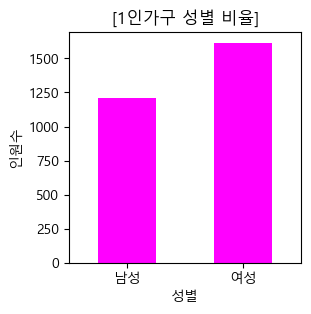

In [65]:
import koreanize_matplotlib
import matplotlib.pyplot as plt 
import pandas as pd

gender_group_1 = df[df['가구원수']== 1].groupby("가구주_성별코드")["가구주_성별코드"].value_counts()


plt.figure(figsize=(3,3))
bar_gender = gender_group_1
bar_gender.plot(kind="bar", label="", cmap="spring", 
            fontsize=10)

plt.title('[1인가구 성별 비율]', fontsize= 12)
plt.xlabel('성별')
plt.ylabel('인원수')

plt.xticks(rotation='horizontal')
plt.show()

In [66]:
age_10 = df[(df["가구주_연령"] >= 10) & (df["가구주_연령"] < 20)]["가구주_연령"]

df.drop(age_10, axis=0, inplace=True)

In [67]:
#연령별 분류 

age = df["가구주_연령"]

def age(age):
    if 20 <= age < 30:
        return '20대'
    elif 30 <= age < 40:
        return '30대'
    elif 40 <= age < 50:
        return '40대'
    elif 50 <= age < 60:
        return '50대'
    elif 60 <= age < 70:
        return '60대'
    else:
        return '70대 이상'



In [68]:
# 데이터 연령대별 구분
df.loc[:, '가구주_연령'] = df['가구주_연령'].apply(age)
df.가구주_연령

0          60대
1          60대
2          50대
3          20대
4          50대
         ...  
9505       30대
9506       50대
9507       60대
9508       60대
9509    70대 이상
Name: 가구주_연령, Length: 9507, dtype: object

전체 가구 전처리 

In [69]:
total_expend = df['소비지출']  #전체 가구 소비 지출
total_expend

0        451464
1       1468101
2       1358773
3       1166942
4       5875488
         ...   
9505    3133653
9506    2995655
9507    5863909
9508    1788251
9509    1102741
Name: 소비지출, Length: 9507, dtype: int64

In [70]:
#이상치 
#1단계 사분위수 (q1, q3, q2, iqr )
Q1 = total_expend.quantile(0.25)
Q3 = total_expend.quantile(0.75)

IQR = Q3 - Q1 

print(Q1)
print(Q3)
print(IQR)


1158294.0
2923801.0
1765507.0


In [71]:
#2단계 : 이상치 임계값(threshold) 설정 

lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가


print(lower_bound)
print(upper_bound)

-1489966.5
5572061.5


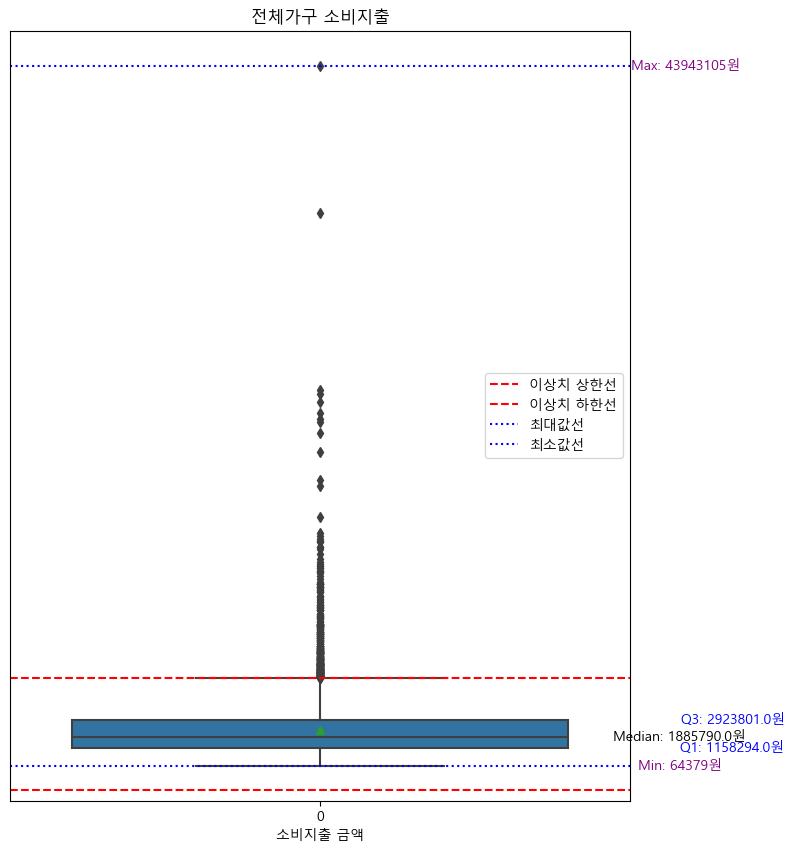

In [72]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=total_expend, showmeans=True)

#이상치값
Q1 = total_expend.quantile(0.25)
Q3 = total_expend.quantile(0.75)
Median = total_expend.median()
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = total_expend.max()
min_value = total_expend.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('전체가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

이상치 제거

In [73]:
#이상치의 조건
condition = (total_expend < lower_bound) | (total_expend > upper_bound)

df_clean = df.loc[~condition,:]
cleaned_total_expend = df_clean["소비지출"]
print(cleaned_total_expend)
print(cleaned_total_expend.count())
print(condition.count())

0        451464
1       1468101
2       1358773
3       1166942
5       1180308
         ...   
9504     694386
9505    3133653
9506    2995655
9508    1788251
9509    1102741
Name: 소비지출, Length: 9112, dtype: int64
9112
9507


이상치 ( 총475개 발견 ) - 제거 필요

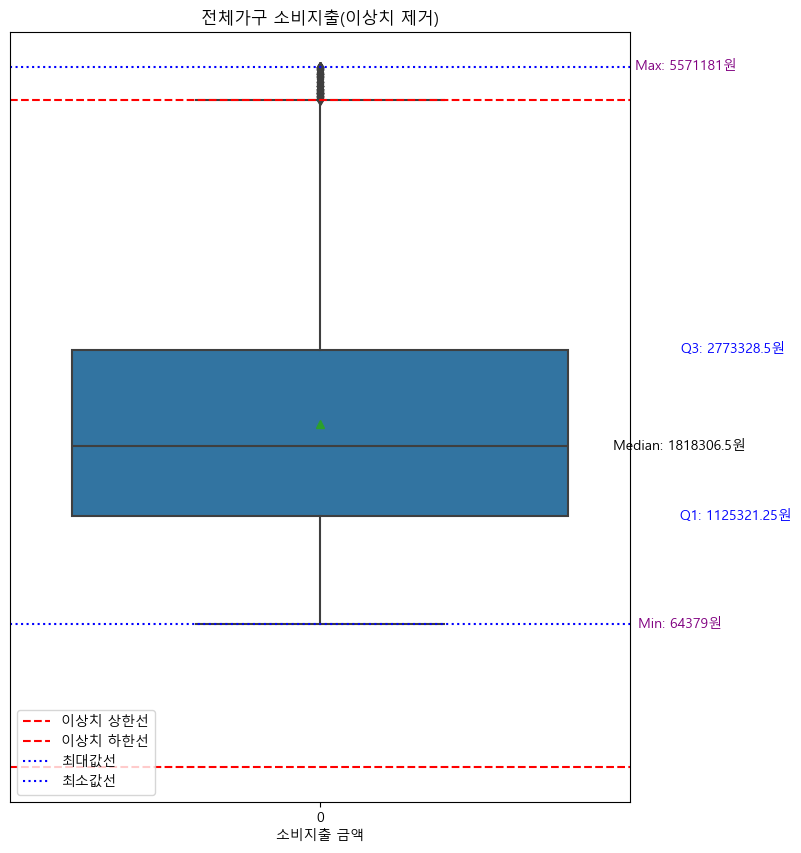

In [74]:
#이상치 제거하기 위한 조건
condition = (df['소비지출'] < lower_bound) | (df['소비지출'] > upper_bound)

plt.rcParams["font.family"] = "Malgun Gothic"

fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=cleaned_total_expend, showmeans=True)

#이상치값
Q1 = cleaned_total_expend.quantile(0.25)
Q3 = cleaned_total_expend.quantile(0.75)
Median = cleaned_total_expend.median()
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = cleaned_total_expend.max()
min_value = cleaned_total_expend.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('전체가구 소비지출(이상치 제거)')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [75]:
#전체가구 총 소비 평균 값
total_expend_mean = int(total_expend.mean())
print(f'전체 가구 총 소비 평균지출 : {total_expend_mean}원')

#이상치제거한 전체가구 총소비평균값
cleaned_total_expend_mean = int(cleaned_total_expend.mean())
print(f'전체 가구 총 소비 평균지출(이상치 제거) : {cleaned_total_expend_mean}원')


전체 가구 총 소비 평균지출 : 2294743원
전체 가구 총 소비 평균지출(이상치 제거) : 2042564원


1차 전처리 = 전체가구에서 1인가구 가져오기 (2825개) 

In [76]:
single_expend = df[df["가구원수"]==1]['소비지출']
single_expend

0        451464
2       1358773
4       5875488
5       1180308
12       637191
         ...   
9499    2933981
9500    1009745
9501    1292380
9504     694386
9508    1788251
Name: 소비지출, Length: 2825, dtype: int64

In [77]:
#이상치 
#1단계 사분위수 (q1, q3, q2, iqr )
Q1 = single_expend.quantile(0.25)
Q3 = single_expend.quantile(0.75)

IQR = Q3 - Q1 

print(Q1)
print(Q3)
print(IQR)
#2단계 : 이상치 임계값(threshold) 설정 

lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가


print(lower_bound)
print(upper_bound)

691050.0
1581954.0
890904.0
-645306.0
2918310.0


2차 전처리 = 1인가구 이상치 확인

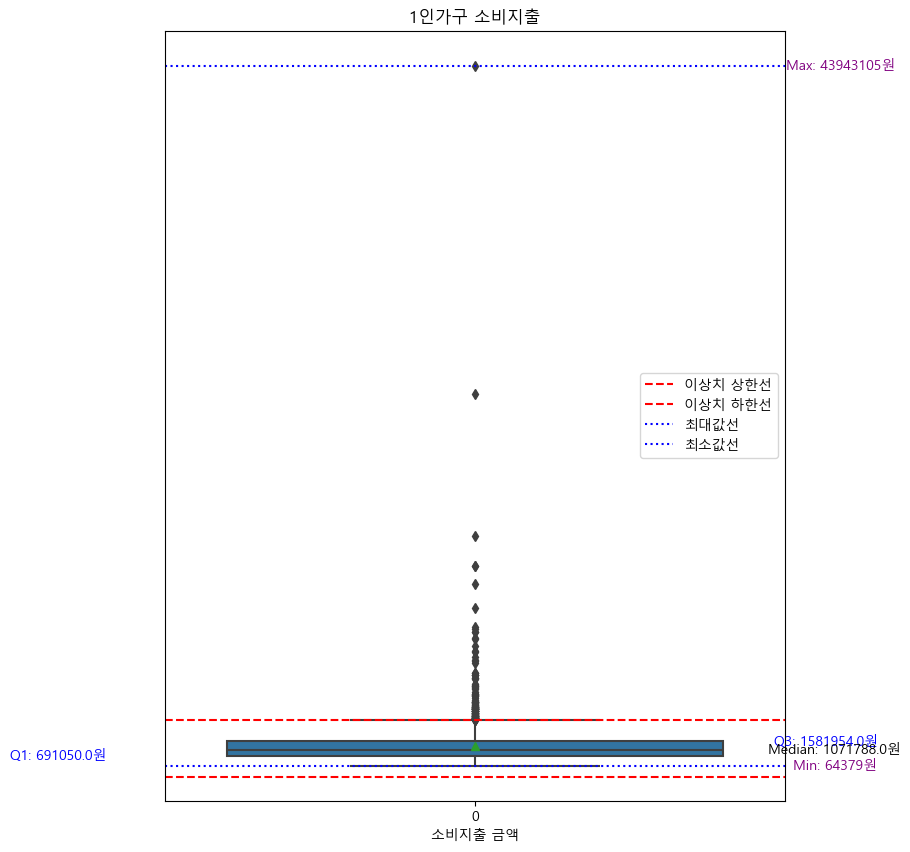

In [78]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=single_expend, showmeans=True)

#이상치값
Q1 = single_expend.quantile(0.25)
Q3 = single_expend.quantile(0.75)
Median = single_expend.median()
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = single_expend.max()
min_value = single_expend.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(-0.75, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.65, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('1인가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

1인가구 이상치 제거 (126개 발견)

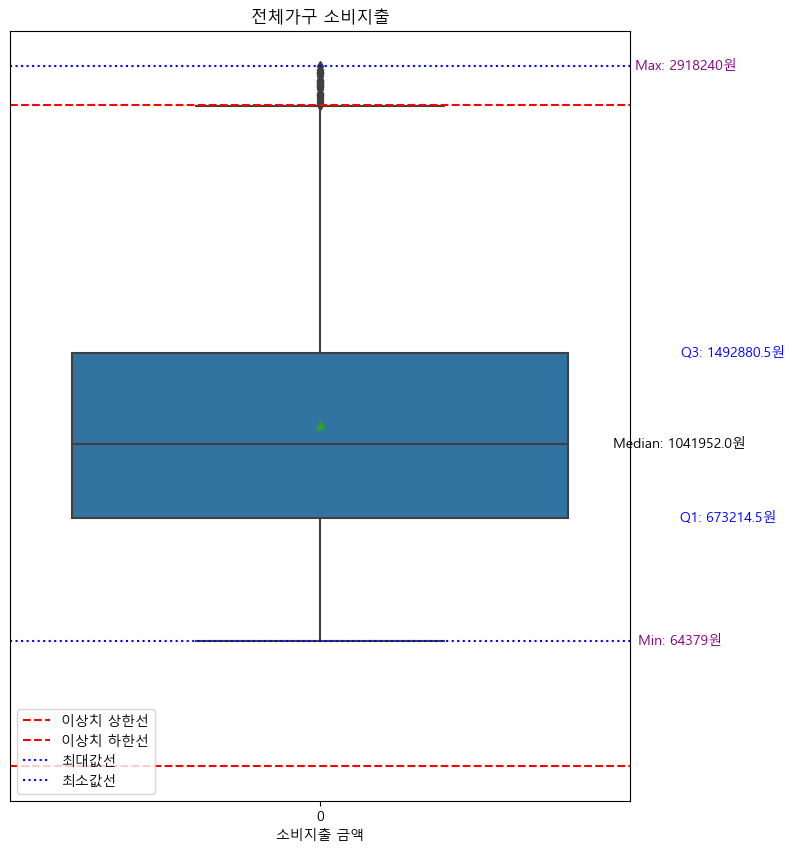

In [79]:
cleaned_single_expend= single_expend[(single_expend >= lower_bound) & (single_expend <= upper_bound)]

import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=cleaned_single_expend, showmeans=True)

#이상치값
Q1 = cleaned_single_expend.quantile(0.25)
Q3 = cleaned_single_expend.quantile(0.75)
Median = cleaned_single_expend.median()
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = cleaned_single_expend.max()
min_value = cleaned_single_expend.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('전체가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [80]:
#전체가구 총 소비 평균 값
single_expend_mean = int(single_expend.mean())
print(f'전체 가구 총 소비 평균지출 : {single_expend_mean}원')

#이상치제거한 전체가구 총소비평균값
cleaned_single_expend_mean = int(cleaned_single_expend.mean())
print(f'전체 가구 총 소비 평균지출(이상치 제거) : {cleaned_single_expend_mean}원')


전체 가구 총 소비 평균지출 : 1307276원
전체 가구 총 소비 평균지출(이상치 제거) : 1136102원


In [81]:
age_group_1 = df[df['가구원수']== 1].groupby("가구주_연령")[["가구원수"]].value_counts()
pd.DataFrame(age_group_1)

,,count
가구주_연령,가구원수,
20대,1,389
30대,1,285
40대,1,284
50대,1,473
60대,1,550
70대 이상,1,844


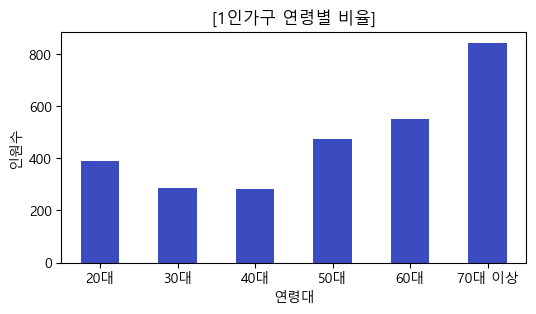

In [82]:
import koreanize_matplotlib
import matplotlib.pyplot as plt 
import pandas as pd

age_group_1 = df[df['가구원수']== 1].groupby("가구주_연령")["가구주_연령"].value_counts()


plt.figure(figsize=(6,3))
bar_age = age_group_1
bar_age.plot(kind="bar", label="", cmap="coolwarm", 
            fontsize=10)

plt.title('[1인가구 연령별 비율]', fontsize= 12)
plt.xlabel("연령대")
plt.ylabel("인원수")

plt.xticks(rotation='horizontal')
plt.show()

교육비 분석


In [102]:
#가구원수가 1인 교육비 총합
import pandas as pd 

condition = df[df["가구원수"] == 1]

total_edu_expenses = condition[["정규교육비","초등교육비","중등교육비","고등교육비","학원보습교육비","학생학원교육비","기타교육비"]].mean()
result_edu = pd.DataFrame(total_edu_expenses)
result_edu.columns = ["총합계"]
result_edu

,총합계
정규교육비,11868.821239
초등교육비,0.000000
중등교육비,408.050619
고등교육비,11460.770619
학원보습교육비,10489.787965
학생학원교육비,4320.739469
기타교육비,372.808850


In [103]:
total_edu_expenses

정규교육비      11868.821239
초등교육비          0.000000
중등교육비        408.050619
고등교육비      11460.770619
학원보습교육비    10489.787965
학생학원교육비     4320.739469
기타교육비        372.808850
dtype: float64

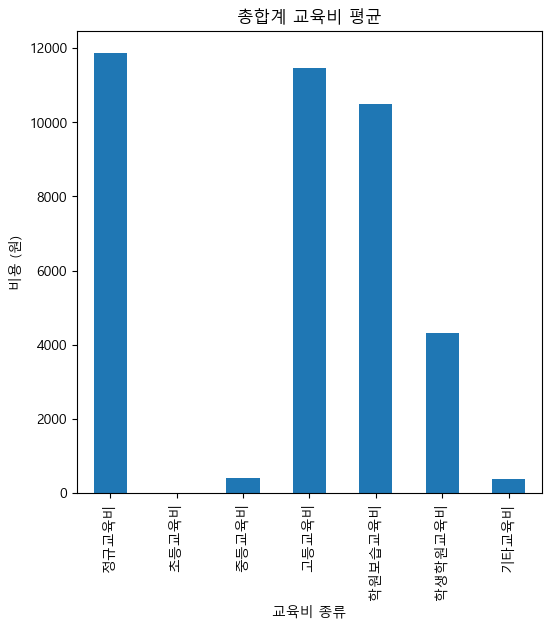

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as py


plt.figure(figsize=(6, 6))
total_edu_expenses.plot(kind='bar', stacked=True)
plt.title('총합계 교육비 평균')
plt.xlabel('교육비 종류')
plt.ylabel('비용 (원)')
plt.xticks(rotation=90)

# plt.legend(title='교육 비용 종류')
plt.show()

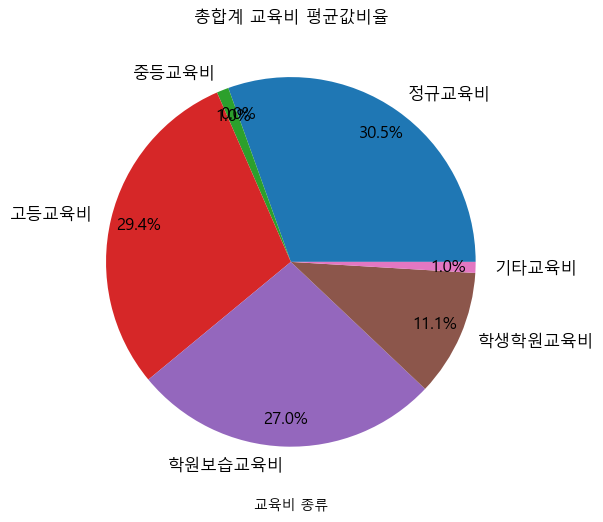

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # 수정: pandas import 수정

plt.figure(figsize=(6, 6))
total_edu_expenses.plot(kind='pie', autopct='%1.1f%%',pctdistance=0.85,fontsize=12) 
plt.title('총합계 교육비 평균값비율')
plt.xlabel('교육비 종류')
plt.ylabel('') 

plt.show()

교육비 (이상치 없음)

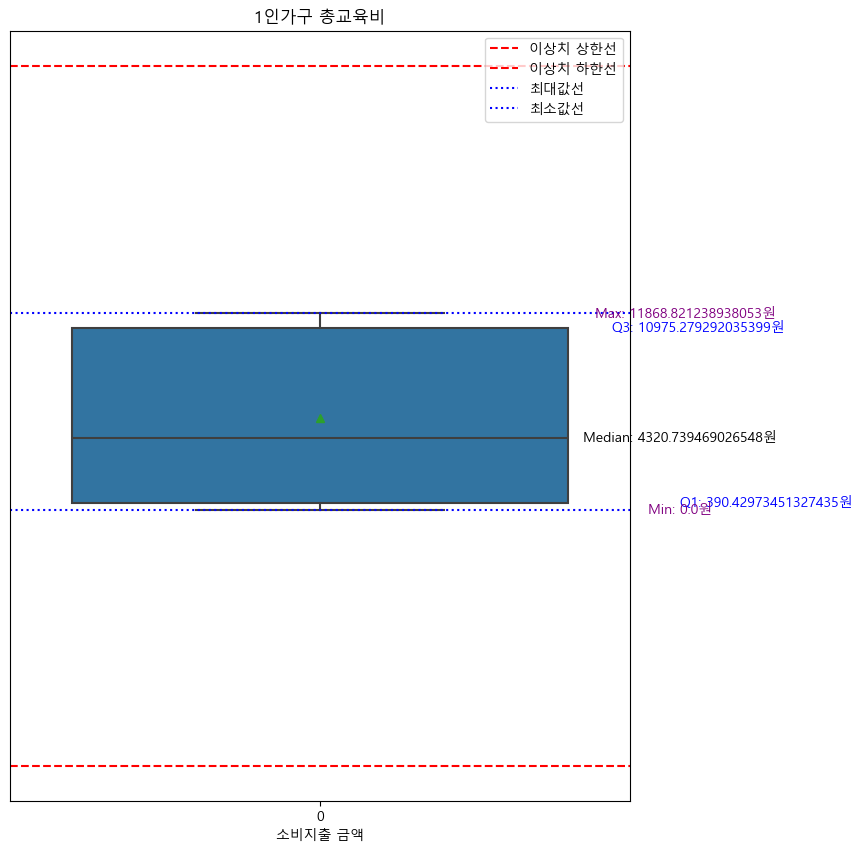

In [108]:
plt.rcParams["font.family"] = "Malgun Gothic"

fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=total_edu_expenses, showmeans=True)

Q1 = total_edu_expenses.quantile(0.25)
Q3 = total_edu_expenses.quantile(0.75)
Median = total_edu_expenses.median()   
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = total_edu_expenses.max()
min_value = total_edu_expenses.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('1인가구 총교육비')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

<Figure size 2000x800 with 0 Axes>

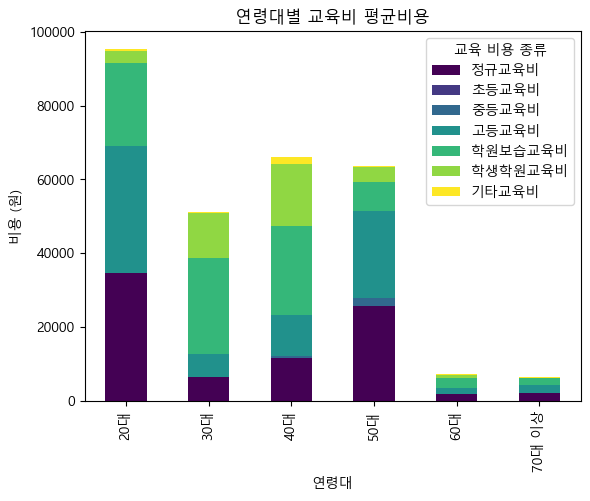

In [111]:
import pandas as pd 
import matplotlib.pyplot as plt

# 음식숙박 = df[["음식숙박비","식대","숙박비"]]

edu_expenses_1 = df[df["가구원수"]==1].groupby('가구주_연령')[["정규교육비","초등교육비","중등교육비","고등교육비","학원보습교육비","학생학원교육비","기타교육비"]].mean()

plt.figure(figsize=(20, 8))
edu_expenses_1.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('연령대별 교육비 평균비용')
plt.xlabel('연령대')
plt.ylabel('비용 (원)')
plt.legend(title='교육 비용 종류')
plt.show()

In [89]:
# # 연령대별로 "교육"이 포함된 열 값을 가져오기(교육비 포함)
# import pandas as pd 

# grouped = df.groupby("가구주_연령")
# new_rows = pd.DataFrame()


# # 연령대별로 "교육"이 포함된 열 값 출력
# for idx, g in grouped:
#     Condition = g[g["가구원수"] == 1]
#     columns_edu = [column for column in df.columns if '교육' in column]
#     new_rows = pd.concat([new_rows, Condition[columns_edu]], ignore_index = True)
    
    
# pd.DataFrame(new_rows)

In [90]:
# edu_sum = new_rows.sum()
# a = pd.DataFrame(edu_sum)


# plt.figure(figsize=(10, 10))
# plt.plot(a.index, a[0],marker=".")
# plt.title('총합계 교육비 비율')
# plt.xlabel('교육비 종류')
# plt.ylabel('비용 (원)')
# plt.xticks(rotation=90)

# # plt.legend(title='교육 비용 종류')
# plt.show()



In [91]:
# columns_edu = [column for column in df.columns if '교육' in column]

# result_total_edu = df.groupby('가구주_연령')[columns_edu].sum()

# plt.figure(figsize=(10, 6))
# result_total_edu.plot(kind='bar', stacked=True, cmap='viridis')
# plt.title('연령대별 교육비 비용')
# plt.xlabel('연령대')
# plt.ylabel('비용 (원)')
# plt.legend(title='교육 비용 종류')
# plt.show()

음식숙박 분석

In [112]:
# 연령대별로 "교육"이 포함된 열 값을 가져오기
import pandas as pd 

condition = df[df["가구원수"] == 1]

total_lodgment_expenses = condition[['식대','숙박비']].mean()
print(total_lodgment_expenses)

식대     189697.441416
숙박비      5698.680354
dtype: float64


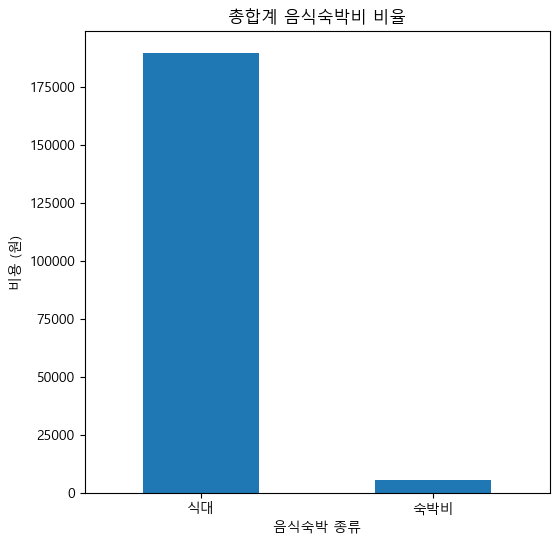

In [113]:
plt.figure(figsize=(6, 6))
total_lodgment_expenses.plot(kind='bar', stacked=True)
plt.title('총합계 음식숙박비 비율')
plt.xlabel('음식숙박 종류')
plt.ylabel('비용 (원)')
plt.xticks(rotation=360)

# plt.legend(title='교육 비용 종류')
plt.show()

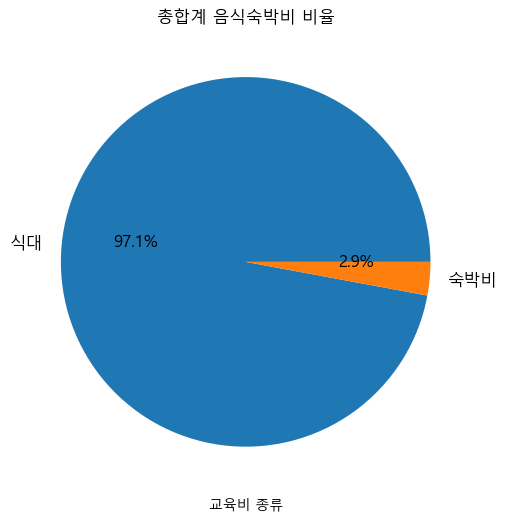

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # 수정: pandas import 수정

plt.figure(figsize=(6, 6))
total_lodgment_expenses.plot(kind='pie', autopct='%1.1f%%\n', fontsize=12)  # 수정: autopct 형식과 fontsize를 조정하여 텍스트 크기 조절
plt.title('총합계 음식숙박비 비율')
plt.xlabel('교육비 종류')
plt.ylabel('')  # 수정: ylabel은 불필요하므로 제거

plt.show()

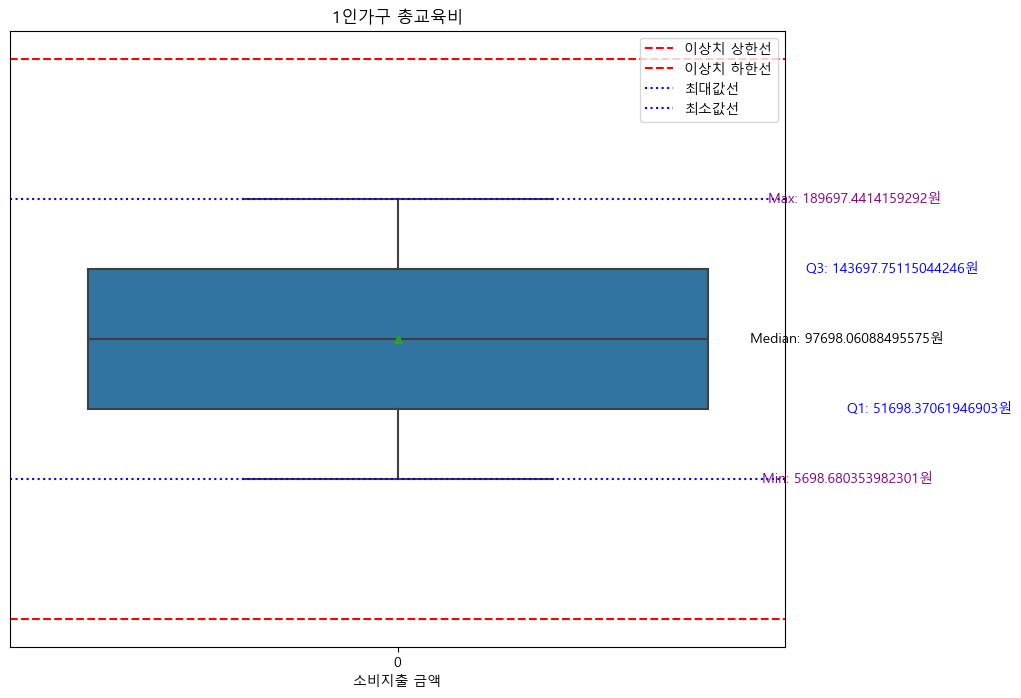

In [115]:
plt.rcParams["font.family"] = "Malgun Gothic"

fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=total_lodgment_expenses, showmeans=True)

Q1 = total_lodgment_expenses.quantile(0.25)
Q3 = total_lodgment_expenses.quantile(0.75)
Median = total_lodgment_expenses.median()   
IQR = Q3 - Q1 

#이상치 범위
lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가

#최대,최소값 
max_value = total_lodgment_expenses.max()
min_value = total_lodgment_expenses.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}원', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}원', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}원', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}원', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}원', ha='center', va='center', fontsize=10, color='purple')

plt.title('1인가구 총교육비')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

<Figure size 1000x600 with 0 Axes>

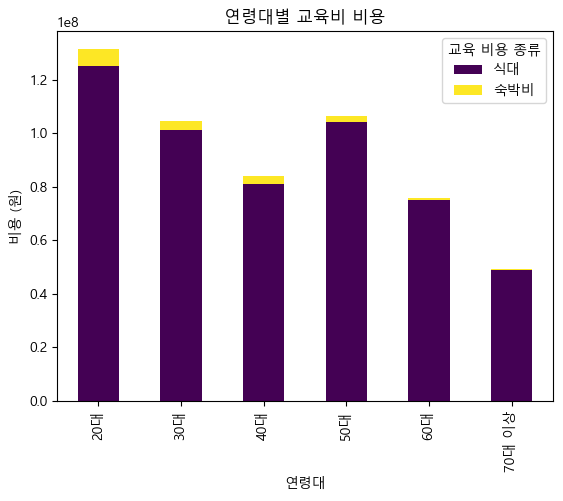

In [116]:
import pandas as pd 
import matplotlib.pyplot as plt

# 음식숙박 = df[["음식숙박비","식대","숙박비"]]

lodgment_expenses_1 = df[df["가구원수"]==1].groupby('가구주_연령')[["식대","숙박비"]].sum()

plt.figure(figsize=(10, 6))
lodgment_expenses_1.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('연령대별 교육비 비용')
plt.xlabel('연령대')
plt.ylabel('비용 (원)')
plt.legend(title='교육 비용 종류')
plt.show()

In [97]:
# # 연령대별로 "교육"이 포함된 열 값을 가져오기(음식숙박비포함)
# import pandas as pd 

# condition = df[df["가구원수"] == 1]

# total_expenses = condition[['음식숙박비','식대','숙박비']].sum()
# print(total_expenses)





In [98]:
# pd.DataFrame(total_expenses)

In [99]:


# plt.figure(figsize=(6, 6))
# total_expenses.plot(kind='bar', stacked=True)
# plt.title('총합계 음식숙박비 비율')
# plt.xlabel('음식숙박 종류')
# plt.ylabel('비용 (원)')
# plt.xticks(rotation=360)

# # plt.legend(title='교육 비용 종류')
# plt.show()

In [100]:
# import pandas as pd 
# import matplotlib.pyplot as plt

# # 음식숙박 = df[["음식숙박비","식대","숙박비"]]

# result_total_lodgment = df.groupby('가구주_연령')[["음식숙박비","식대","숙박비"]].sum()

# plt.figure(figsize=(10, 6))
# result_total_lodgment.plot(kind='bar', stacked=True, cmap='viridis')
# plt.title('연령대별 교육비 비용')
# plt.xlabel('연령대')
# plt.ylabel('비용 (원)')
# plt.legend(title='교육 비용 종류')
# plt.show()

In [101]:
import seaborn as sns

